# Regresión Lineal Ordinaria (LSS)

### a) Construcción del dataframe

In [1]:
#!usr/bin/env python
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)

La función drop devuelve un nuevo objeto con las etiquetas y ejes dados removidos.
Entonces, se remueve la columna sin nombre que denota la posición de cada registro del _dataframe_, con el siguiente código:
```python
df = df.drop('Unnamed: 0', axis=1)
```
Además la columna _train_ indica si el registro pertenece o no al conjunto de entrenamiento. Una vez almacenada en la variable *istrain_str* se elimina del conjunto de datos con la función drop, ya que no es un predictor (característica).

```python
df = df.drop('train', axis=1)
```

### b) Descripción del conjunto de datos

In [2]:
print 'El dataset se compone de %d'% df.shape[0],' registros (pacientes), cada uno de los cuáles está descrito por %d variables.\n'% df.shape[1]
df.info()
df.describe()

El dataset se compone de 97  registros (pacientes), cada uno de los cuáles está descrito por 9 variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


Las variables del conjunto de datos se describen a continuación:
1. **lcavol**: Logaritmo del volumen de cáncer presente. (Predictor)
3. **lweight**: Logaritmo del peso de la próstata. (Predictor)
4. **age**: Edad. (Predictor)
5. **lbph**: Logaritmo de la cantidad de hiperplasia benigna de próstata. (Predictor)
6. **svi**: Indica si existe invasión de la vesícula seminal o no. (Predictor)
7. **lcp**: Logaritmo de la penetración capsular. (Predictor)
8. **gleason**: Medida del grado de agresividad del cáncer, en base a la escala de Gleason. (Predictor)
9. **pgg45**: Porcentaje que representa la presencia de los patrones de Gleason 4 y 5. (Predictor)
10. **lpsa**: Logaritmo del nivel de antígeno prostático específico (PSA). (Variable que se quiere predecir)

Se debe resaltar que no existen valores nulos para ningún registro.

### c) Normalización de los datos

In [3]:
from sklearn.preprocessing import StandardScaler

#Normalizacion
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#La variable Y (lPSA) no se normaliza, sólo se normalizan las caracteristicas/predictores (features)
df_scaled['lpsa'] = df['lpsa']

# Notamos que una vez normalizado, el promedio (mean) de cada feature es practicamente 0
# y la desviacion estandar (std) es muy cercana a 1.
df_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000
mean,-9.614302e-17,-3.216213e-16,3.433679e-16,-4.721309e-17,-1.327689e-16,8.240831e-17,-1.476482e-16,-1.816989e-16,2.478387
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.154329
min,-2.300218e+00,-2.942386e+00,-3.087227e+00,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,-0.430783
25%,-7.139973e-01,-5.937689e-01,-5.219612e-01,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,1.731656
50%,8.264956e-02,-1.392703e-02,1.531086e-01,1.383966e-01,-5.256575e-01,-4.450983e-01,3.444069e-01,-3.343557e-01,2.591516
75%,6.626939e-01,5.806076e-01,5.581506e-01,1.010033e+00,-5.256575e-01,9.762744e-01,3.444069e-01,5.566470e-01,3.056357
max,2.107397e+00,2.701661e+00,2.043304e+00,1.542252e+00,1.902379e+00,2.216735e+00,3.128363e+00,2.695054e+00,5.582932


##### Importancia de Normalizar
Antes generar un modelo predictivo es necesario normalizar los datos, pues se está trabajando con variables medidas en unidades y escalas diferentes. Al normalizar, se eliminan los efectos de la media y la varianza de cada variable, volviéndose posible realizar comparaciones razonables entre estas. Sólo se deben normalizar las características (_features_), por tanto la variable _lpsa_ se mantiene respecto al _dataset_ original. También, se observa que la media de cada variable tiende a 0 y la varianza es muy cercana a 1. 

### d) Regresión lineal ordinaria

In [4]:
import sklearn.linear_model as lm

# Se crea el modelo de regresion lineal
X = df_scaled.ix[:,:-1] # Se obtinen las Caracteristicas (features) lcavol...pgg45
N = X.shape[0] # Cantidad de datos (97 filas/registros)
X.insert(X.shape[1], 'intercept', np.ones(N)) # Se agrega la columna Intercepto (columna de unos)
y = df_scaled['lpsa'] # La variable dependiente lPSA es almancenada en y
Xtrain = X[istrain] # Se crea el conjunto de entrenamiento para las caracteristicas
ytrain = y[istrain] # Se crea el conjunto de entramiento para la variable a predecir
Xtest = X[np.logical_not(istrain)] # Se crea el conjunto de prueba para las caracteristicas PSA
ytest = y[np.logical_not(istrain)] # Se crea el conjunto de prueba para la variable a predecir PSA
linreg = lm.LinearRegression(fit_intercept = False) #Generación del modelo
linreg.fit(Xtrain, ytrain) # Se ajusta (fit) el modelo de acuerdo a los datos de entrenamiento

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### e) Pesos y Z-score

In [5]:
# Se obtiene el peso asociado a cada variable y su error estandar
weights = linreg.coef_

# Se estima la varianza 
yhat_train = linreg.predict(Xtrain)
N = Xtrain.shape[0]
p = Xtrain.shape[1]
varianza = sum(np.power(yhat_train - ytrain, 2)) / (N - p - 1)

# Se obtiene vj que es el elemnto jth de la diagonal de (X.T*X)^-1
vj = np.diag(np.linalg.pinv(Xtrain.T.dot(Xtrain)))

# A partir de lo anterior, se calculan los Z-score de cada variable
Z_score = weights/( np.sqrt(varianza* vj))

print '{:12} {:10} {:10}'.format('Variable', 'Peso', 'Z-score')
for name, w, z in zip(Xtrain.columns.values, weights, Z_score):
    print '{:8} {:10.4f} {:10.4f}'.format(name, w, z)

Variable     Peso       Z-score   
lcavol       0.6760     5.3198
lweight      0.2617     2.7270
age         -0.1407    -1.3838
lbph         0.2091     2.0380
svi          0.3036     2.4479
lcp         -0.2870    -1.8507
gleason     -0.0212    -0.1454
pgg45        0.2656     1.7228
intercept     2.4649    27.3593


De acuerdo al valor de *z_score*, las variables que presentan una mayor correlación con la variable a predecir son *lcavol*, *lweight* y *svi*. Si se utiliza un nivel de significancia del 5%, aquellas variables que se encuentren en el intervalo [-2.0, +2.0] no existirá suficiente evidencia que demuestre la relación con *lpsa*. Así, las variables *age*, *lcp*, *gleason* y pgg45 no están relacionadas con la variable a predecir.

### f) Estimación de error de predicción

In [6]:
from sklearn import cross_validation

#Se estima error de prediccion del modelo utilizando k-fold k = 5 y k = 10
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print 'MSE test sin Cross Validation = %.4f'% mse_test
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

print 'Cross validation'
for i in range(5,11,5):
    k_fold = cross_validation.KFold(len(Xm),i)
    mse_cv = 0
    for k, (train, val) in enumerate(k_fold):
      linreg = lm.LinearRegression(fit_intercept = False)
      linreg.fit(Xm[train], ym[train])
      yhat_val = linreg.predict(Xm[val])
      mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
      mse_cv += mse_fold
    mse_cv = mse_cv/i
    print 'k = %-3d'% i, ' MSE = %.4f'% mse_cv


MSE test sin Cross Validation = 0.5213
Cross validation
k = 5    MSE = 0.9565
k = 10   MSE = 0.7572


Se observa que el error cuadrático medio aumenta bastante al utilizar cross-validation en comparación al resultado obtenido sin usarlo. Esto indica que existe un alto nivel de dependencia del modelo respecto a los datos usados para construirlo. Es decir, el modelo se sobre ajusta (*overfitting*) a los datos de entrenamiento. Por otro lado, se debe tener en cuenta que el conjunto de datos es bastante pequeño, perjudicando al desempeño cross-validation.

### e) Quantile-Quantile plot (Q-Q plot)

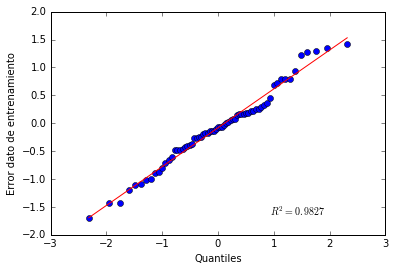

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

#Se estima error de prediccion por cada dato de entrenamiento
yhat_train = linreg.predict(Xtrain)
ytrain_array = np.asarray(ytrain)
error = yhat_train - ytrain_array

#Se genera grafico de errores
stats.probplot(error, dist='norm', plot=plt)
plt.title('')
plt.ylabel('Error dato de entrenamiento')
plt.show()

##### ¿Existe normalidad en los datos?
Se puede observar en el gráfico, que el conjunto de errores en los datos de entrenamiento comparados con los percentiles de una distribución normal pueden representarse mediante una recta. Esto se reafirmado con el coeficiente de correlación $R^2 = 0.9827$. Como consecuencia de lo anterior, y de acuerdo con el marco teórico, es correcto señalar que los errores siguen una distribución normal.

# 2 ) Selección de Atributos

### a) Forward stepwise selection

En primer lugar se restablecen las matrices

In [8]:
X = df_scaled.ix[:,:-1] # Se obtinen las Caracteristicas (features) lcavol...pgg45
N = X.shape[0] # Cantidad de datos (97 filas/registros)
X.insert(X.shape[1], 'intercept', np.ones(N)) # Se agrega la columna Intercepto (columna de unos)
y = df_scaled['lpsa'] # La variable dependiente lPSA es almancenada en y
Xtrain = X[istrain] # Se crea el conjunto de entrenamiento para las caracteristicas
ytrain = y[istrain] # Se crea el conjunto de entramiento para la variable a predecir
Xtest = X[np.logical_not(istrain)] # Se crea el conjunto de prueba para las caracteristicas PSA
ytest = y[np.logical_not(istrain)] 
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
Xt = Xtest.as_matrix()
yt = ytest.as_matrix()

El criterio a utilizar para incluir o remover predictores del modelo es K-fold cross validation, esto permitirá evaluar localmente cada variable, y reducir en cierta forma el overfitting que produce solo utilizar MSE. Con esto es posible que el modelo generalice en mayor medida ya que se puede obtener una mejor estimación del error de pruebas en cada paso.
Se define la siguiente función que obtiene el MSE de un k-fold cross validation con $k=10$

In [9]:
def MSE_Kfold(Xm, ym):
	k_fold = cross_validation.KFold(len(Xm),10)
	mse_cv = 0
	for k, (train, val) in enumerate(k_fold):
		linreg = lm.LinearRegression(fit_intercept = False)
		linreg.fit(Xm[train], ym[train])
		yhat_val = linreg.predict(Xm[val])
		mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
		mse_cv += mse_fold
	mse_cv = mse_cv / 10
	return mse_cv

A continuación se define la función que realiza Forward-StepWise selection. Notar que también se mantiene el mse "común" para comparar posteriormente.

In [10]:
def fss(x, y, names_x, k = 10000, criterio = "mse"):
    #p es el numero de variables(sin intercepto)
	p = x.shape[1]-1
	k = min(p, k)
	names_x = np.array(names_x)
    #variables restantes
	remaining = range(0, p)
    #se comienza con el intercepto como base
	selected = [p]
	current_score = 0.0
	best_new_score = 0.0
	while remaining and len(selected)<=k :
		score_candidates = []
		for candidate in remaining:
            #Se crea el modelo de regresion y se evalua en las variables
			model = lm.LinearRegression(fit_intercept=False)
			indexes = selected + [candidate]
			x_train = x[:,indexes]
			predictions_train = model.fit(x_train, y).predict(x_train)
			residuals_train = predictions_train - y
            #Se evaluan los dos indices para incorporar variables
			mse_candidate = np.mean(np.power(residuals_train, 2))
			mse_cv_candidate = MSE_Kfold(x_train,y)
			if criterio == "mse":
				score_candidates.append((mse_candidate, candidate))
			elif criterio == "cv":
				score_candidates.append((mse_cv_candidate, candidate))
		score_candidates.sort()
		score_candidates[:] = score_candidates[::-1]
        #Se agrega el mejor candidato.
		best_new_score, best_candidate = score_candidates.pop()
		remaining.remove(best_candidate)
		selected.append(best_candidate)
		#print "selected = %s ..."%names_x[best_candidate]
		#print "totalvars=%d, mse = %f"%(len(indexes)-1,best_new_score)
	return selected

Además se utilizan las siguientes funciones auxiliares para obtener el error cuadrático medio para cada número de variables y graficar tanto training como testing set. Notar que como las funciones bss y fss retornan vectores particulares, el análisis para ambos es distinto.  

In [11]:
def CalcularMse(vector_selected, xm,ym,xt,yt,mode):
    #Si es modo bss el vector de entrada es el orden de eliminacion
	if mode=="bss":
			indexes = vector_selected[:]
    #En cambio si es fss es el orden en que se agregan las variables.
	else:
		indexes = [xm.shape[1]-1]
	variables = range(1, len(vector_selected))
	mse_training = []
	mse_testing = []
	for i in range(1, len(vector_selected)):
		if mode=="bss":
            #En este caso indexes es un arreglo de todas las variables, y se borra 
            # la primera segun el orden de eliminacion para evaluar el mse.
			if i!=1:
				indexes = [x for j,x in enumerate(indexes) if j!=1]
		else:
            #En este caso solo se agrega la siguiente variable en elvector de seleccion fss.
			indexes = indexes + [vector_selected[i]]
		x_train = xm[:,indexes]
		x_test = xt[:,indexes]
        # Se calcula el MSE para ese conjunto particular de variables.
		model = lm.LinearRegression(fit_intercept=False)
		predictions_train = model.fit(x_train, ym).predict(x_train)
		predictions_test = model.predict(x_test)
		residuals_train = predictions_train - ym
		residuals_test = predictions_test - yt
		mse_training.append(np.mean(np.power(residuals_train, 2)))
		mse_testing.append(np.mean(np.power(residuals_test, 2)))
    #retorna los errores respectivos en una tupla de 2 listas.
	return (mse_training,mse_testing,variables)

def PlotMSE(data, criterio, mode="fss"):
	axes = plt.gca()
	if mode=="fss":
		plt.plot(data[2], data[0] , color='blue', linewidth=3, label = "training set")
		plt.plot(data[2], data[1] , color='red', linewidth=3, label = "testing set")
		axes.set_ylim([0.3,0.8])
	elif mode =="bss":
		plt.gca().invert_xaxis()
		plt.plot(data[2][::-1], data[0] , color='blue', linewidth=3, label = "training set")
		plt.plot(data[2][::-1], data[1] , color='red', linewidth=3, label = "testing set")
		axes.set_ylim([0.3,1.5])

	plt.title('Error versus numero de variables ' + mode + ' - ' + criterio)	
	plt.legend()
	plt.xlabel('Numero de variables')
	plt.ylabel('Error MSE')
	plt.show()

##### A continuación se muestran los gráficos obtenidos:

Orden seleccion mse:  ['Lcavol', 'Lweight', 'Svi', 'Lbph', 'Pgg45', 'Lcp', 'Age', 'Gleason']
Orden seleccion cv:  ['Lcavol', 'Lweight', 'Lbph', 'Svi', 'Pgg45', 'Lcp', 'Age', 'Gleason']


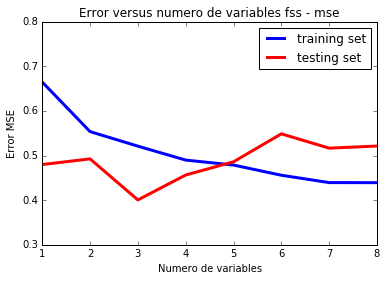

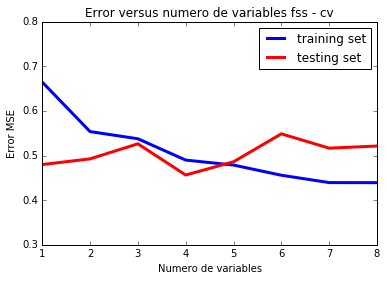

In [12]:
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
fss_result_mse = fss(Xm,ym,names_regressors, criterio = "mse")
fss_result_cv = fss(Xm,ym,names_regressors, criterio = "cv")
print "Orden seleccion mse: ", [names_regressors[x] for i,x in enumerate(fss_result_mse[1:])]
print "Orden seleccion cv: ", [names_regressors[x] for i,x in enumerate(fss_result_cv[1:])]
PlotMSE(CalcularMse(fss_result_mse,Xm,ym,Xt,yt,"fss"),"mse", mode="fss")
PlotMSE(CalcularMse(fss_result_cv,Xm,ym,Xt,yt,"fss"),"cv", mode="fss")

Como se aprecia, k-fold y mse son muy similares en cuanto a su gráfica. A priori el grafico MSE parece indicar que con 3 variables: Lcavol, Lweight y Svi el error es mínimo, pero analizando el grafico CV,  se puede notar que se acercan las curvas, ya que intercambia el orden de la tercera y cuarta variable agregada, entonces lo que ocurre en MSE puede ser un caso particular para estos datos, ya que no es normal que el error disminuya tan rápidamente en la tercera variable. Entonces una mejor forma  de seleccionar las variables es elegir el punto de intersección de las curvas o un valor cercano a este, en este caso puede ser 4 o 5 variables.

Esto permite una mejor generalización y disminuir la complejidad del problema, ya que como se nota, al incluir mas de 5 variables el error aumenta significativamente, provocando sobreajuste(overfitting) por demasiada información. En cualquier caso las mejores variables son invariantes para MSE comun o MSE con cross validation,  las cuales son Lcavol, Lweight, Svi, Lbph y  Pgg45.

### b) Backward Stepwise selection

Este caso es muy similar al anterior, solo se realizan ciertas modificaciones en la función pero los criterios se mantienen. Se debe notar que ahora el eje de las variables representa las variables "disponibles" en el modelo.

In [13]:
def bss(x, y, names_x, k = 10000, criterio = "mse"):
    #p es el numero de variables(sin intercepto)
	p = x.shape[1]-1
	k = min(p, k)
	names_x = np.array(names_x)
    #variables restantes
	remaining = range(0,p)
    #Selected en este caso contiene todas las variables incluido el intercepto
	selected = range(0, p+1)
    #Variable que agrega secuencialmente las variables eliminadas, comienza con el intercepto
	order_del = [p]
	current_score = 0.0
	best_new_score = 0.0
    #la condicion ahora es mientras queden almenos 2 variables
	while remaining and len(selected)>=2 :
		score_candidates = []
		for candidate in remaining:
            # Copia para evaluar subconjuntos de variables
			sel_copy = selected[:]
			model = lm.LinearRegression(fit_intercept=False)
            #Se remueve el candidato a borrar
			sel_copy.remove(candidate)
			indexes = sel_copy
            #Modelo de prediccion con el conjunto de variables sin el candidato
			x_train = x[:,indexes]
			predictions_train = model.fit(x_train, y).predict(x_train)
			residuals_train = predictions_train - y
			mse_candidate = np.mean(np.power(residuals_train, 2))
			mse_cv_candidate = MSE_Kfold(x_train,y)
			if criterio == "mse":
				score_candidates.append((mse_candidate, candidate))
			elif criterio == "cv":
				score_candidates.append((mse_cv_candidate, candidate))
		score_candidates.sort()
		score_candidates[:] = score_candidates[::-1]
        #En este caso el ultimo elemento representa el menor error de las variables restantes 
        #sin el candidato y por ende el candidato a borrar
		worst_new_score, worst_candidate = score_candidates.pop()
        #Lo que se retorna es el orden de eliminacion
		order_del.append(worst_candidate)
        #se quita la peor variablede la lista
		remaining.remove(worst_candidate)
		selected.remove(worst_candidate)
		#print "selected = %s ..."%names_x[best_candidate]
		#print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
	return (order_del,selected)

##### Gráficos y orden de eliminación de los predictores

Orden eliminacion mse:  ['Gleason', 'Age', 'Lcp', 'Pgg45', 'Lbph', 'Svi', 'Lweight', 'Lcavol']
Orden eliminacion cv:  ['Gleason', 'Age', 'Lcp', 'Pgg45', 'Svi', 'Lbph', 'Lweight', 'Lcavol']


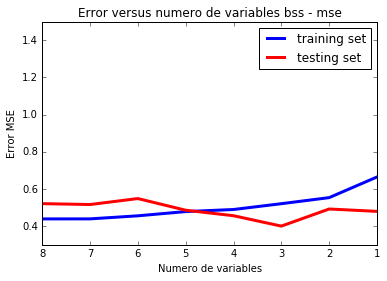

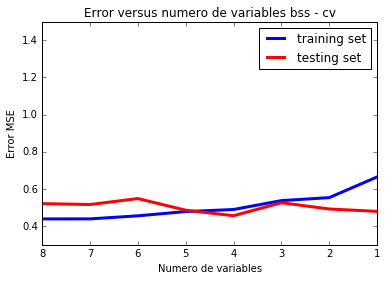

In [14]:
bss_result_mse = bss(Xm,ym,names_regressors, criterio ="mse")
bss_result_cv = bss(Xm,ym,names_regressors, criterio ="cv")
print "Orden eliminacion mse: ", [names_regressors[x] for i,x in enumerate(bss_result_mse[0][1:])]
print "Orden eliminacion cv: ", [names_regressors[x] for i,x in enumerate(bss_result_cv[0][1:])]
PlotMSE(CalcularMse(bss_result_mse[0],Xm,ym,Xt,yt,"bss"), "mse",mode="bss")
PlotMSE(CalcularMse(bss_result_cv[0],Xm,ym,Xt,yt,"bss"), "cv",mode="bss")

En el caso de BSS, se puede apreciar que tanto para MSE como para Cross Validation el orden de eliminación es el mismo que el orden de selección en FSS. Además los errores son los mismos, con un costo mayor, ya que BSS debe manipular muchas variables desde el comienzo y desde ahí comenzar a descartar. FSS por su parte es mucho más rápido en ese sentido por que solo mira localmente en cada paso, produciendo los mismos resultados con menor computo. 
Nuevamente 4 o 5 variables entregan un resultado que se adecua muy bien, y para MSE  el mejor criterio está en seleccionar las variables:  Lcavol, Lweight y Svi ya que produce el menor error.
Por otra parte, CV  cambia el orden de la tercera y cuarta variable como en FSS. En general las variables que no producen sobreajuste son Lcavol, Lweight, Svi, Lbph y Pgg45.

# 3) Regularización

(a) En este caso se utiliza un regresion lineal con regularización usando ridge regression. $$\hat \beta{}^\mathrm{ridge} = \underset{\beta}{\mathrm{argmin}}\left\{\sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2\right\}$$Se debe notar que se quita el intercepto, es decir, $\beta_{0}$, ya que la función Ridge trabaja con los features concretos del dataset y el intercepto es estimado como: $$ \beta_{0} = \overline{y} = \frac{1}{N} \sum_{i=1}^{N} y_{i}$$ Si el intercepto no es quitado del término de penalización, puede provocar desplazamientos que eventualmente alterarían el origen del vector $Y$, por lo cual un desplazamiento "c" en los target $y_{i}$ no necesariamente provocaría un desplazamiento "c" en los valores predecidos $\hat y_{i}$.

En el siguiente caso se usa Ridge con distintos valores del parámetro de regularización  $\lambda \in [10^{-1},10^{4}]$ para determinar la importancia de las variables, mostrando asi los pesos asociados a cada variable, esto es sus coeficientes $\beta$.

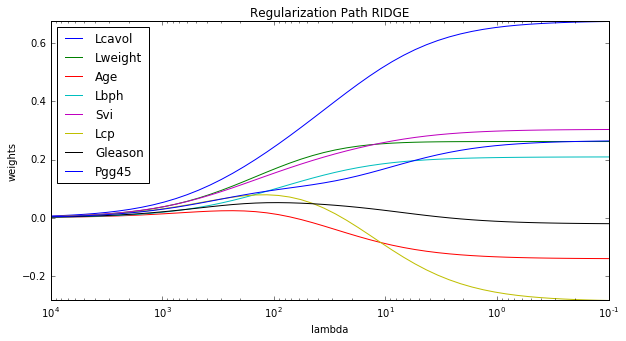

In [15]:
plt.figure(figsize=(10,5))
from sklearn.linear_model import Ridge
#Se remueve intercepto
X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
#Fit intercet ajusta automaticamente el intercepto al promedio de ytrain
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    # se asigna el coeficiente de regularizacion "a".
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
    #Se obtienen los cieficientes del modelo
	coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
	#print alphas_.shape
	#print y_arr.shape
	plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

A partir del gráfico se puede determinar la importancia de cada variable en el modelo para cada valor de $\lambda$. Según la formulación final de los $\beta{}^\mathrm{ridge}$, que contiene un termino $ \frac{ d_{i}^{2}}{d_{i}^{2} + \lambda}$, el peso de los coeficientes se ve directamente afectado en el denominador por el término de regularización, por ende carece de sentido utilizar $\lambda$ demasiado grandes. Además, existe una clara separación de las 5 variables superiores en el gráfico a partir de $\lambda \in [10^{-1}, 10^{2}]$. Otro factor importante a considerar es que la variable Lcavol siempre tiene mayor peso sobre las demás a menos que $\lambda$ sea demasiado grande como se mencionó anteriormente. Se sabe que Ridge acota en la dirección de las componentes principales, por lo mismo las variables con menor varianza se ven más afectadas. En este caso Lcavol, Svi y Lweight son menos afectadas por la penalización, por lo mismo se puede decir que son los estimadores con mayor variabilidad. 
Notar además que Ridge no elimina variables del modelo a menos que $\lambda$ es infinito,en ese caso todos los coeficientes se vuelven cero.

#### (b)
Ahora se utiliza Lasso con parámetro de regularización $\lambda \in [10^{1},10^{-2}]$ y se construye el siguiente grafico de los coeficientes del modelo en función de los distintos $\lambda$ en el rango.

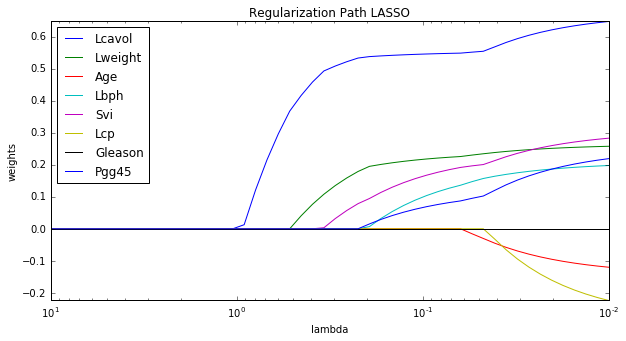

In [16]:
plt.figure(figsize=(10,5))
from sklearn.linear_model import Lasso
#Cambian los valores de lambda
alphas_ = np.logspace(1,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
	#print alphas_.shape
	#print y_arr.shape
	plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

 Lasso al utilizar la norma $\ell^{1}$, es mucho más estricto y por lo mismo $\textbf{si}$ es capaz de eliminar variables del modelo al establecer sus coeficientes con valor cero. Los valores de $\lambda$ en este caso deben ser menores a 1 para que se comience a notar distinción entre las variables más importantes.
 
Al igual que en Ridge, las variables más relevantes son Lcavol, Svi y Lweight ya que Lasso tambien favorece a las de mayor variabilidad. Además es interesante notar que una variable no aparece en ningun modelo, esta es Gleason, ya que su coeficiente asociado permanece siempre en cero, por lo tanto su relevancia es mínima y según el Lasso puede ser perfectamente descartada.

Luego de que $\lambda < 10^{-1}$ , 3 variables son descartadas del modelo, estas son Gleason, Lcp y Age. Lasso es mucho más "gráfico" y efectivo al momento de elegir variables en regresión lineal, sin embargo con Ridge se puede determinar de igual forma un análisis similar pero requiere mayor esfuerzo e interpretación. Para ambos sin embargo, un valor de regularización adecuado es fundamental para un correcto estudio de las técnicas.

### (c)
Se realiza un gráfico que muestra dos curvas, que corresponden al error de entrenamiento y error de pruebas en función del valor del parámetro de regularización. Esto permitirá establecer si la elección de variables de Ridge es adecuada y no produce sobreajuste.

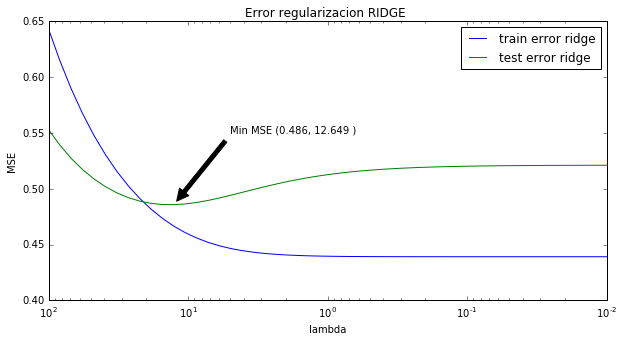

In [17]:
plt.figure(figsize=(10,5))
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
#Se deben comparar ambos errores cuadraticos promedio.
mse_test = []
mse_train = []
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
    #Se predicen los valores f(x) del modelo.
	yhat_train = model.predict(Xtrain)
	yhat_test = model.predict(Xtest)
	mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
	mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.annotate('Min MSE ('+  str(round(np.min(mse_test),3)) + ', '+ str(round(alphas_[np.argmin(mse_test)],3)) +' )' 
            , xy=(alphas_[np.argmin(mse_test)], np.min(mse_test)), xytext=(5, 0.55),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Error regularizacion RIDGE ')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Cuando el valor de regularización $\lambda \in [10, 10^{2}]$ las curvas son similares ya que toman valores cercanos entre si y sus pendientes son parecidas igualmente. Una vez que la penalización es menor, esto ocurre aproximadamente cuando $ \lambda < 10$, se nota un sobreajuste del modelo en los datos de entrenamiento, ya que el error de entrenamiento es pequeño en comparación al de pruebas. 

Anteriormente se mencionó que cualquier valor para el parámetro de regularización bajo $10^{2}$ podía ser correcto, sin embargo con esta nueva información es claro que un buen criterio de elección para lambda está en $\lambda \approx 10$. Particularmente puede tomarse el punto donde se intersectan ambas curvas como valor de regularización ya que este es el punto de inflexión del error de pruebas.

### (d) 
Ahora se realiza un análisis similar con Lasso.

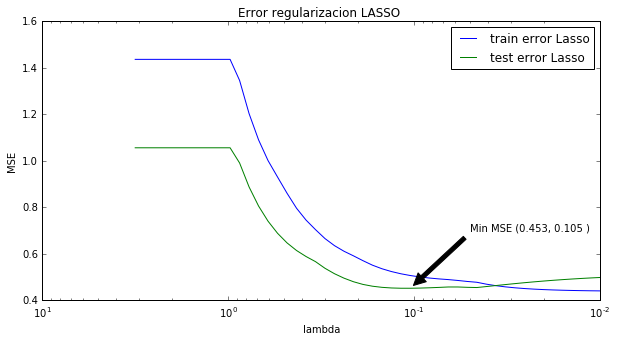

In [18]:
plt.figure(figsize=(10,5))
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	yhat_train = model.predict(Xtrain)
	yhat_test = model.predict(Xtest)
	mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
	mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.annotate('Min MSE ('+  str(round(np.min(mse_test),3)) + ', '+ str(round(alphas_[np.argmin(mse_test)],3)) +' )' 
            , xy=(alphas_[np.argmin(mse_test)], np.min(mse_test)), xytext=(0.05, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(alphas_,mse_train,label='train error Lasso')
ax.plot(alphas_,mse_test,label='test error Lasso')
plt.legend(loc=1)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Error regularizacion LASSO ')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

En este caso, el error de prueba es menor que el error de entrenamiento hasta un valor de $\lambda \approx 10^{-1}$, lo que indicaría que el método generaliza bastante bien. Observando el grafico de valor de regularizacion versus peso de los coeficientes, precisamente hasta $\lambda \approx 10^{-1}$ es donde se toma en consideración las mejores 5 variables. Valores de $\lambda$ menores a ello, producen sobreajuste en los datos de entrenamiento, particularmente donde ocurre la intersección de las curvas, esto es debido a que se consideran más variables en el modelo. 

Por lo anteriormente señalado es factible tomar el valor de $\lambda$ donde el MSE es menor en la curva de testing error,esto es en la vecindad de $\lambda \approx 10^{-1}$ apuntando preferiblemente hacia valores más grandes que este.

### (e)
A continuación se muestran las iteraciones en busca de los mejores parametros basados en cross validation.

In [19]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
alphas_ = np.logspace(0.5,-2,base=10)
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
	model.set_params(alpha=a)
	mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in k_fold]
	if np.mean(mse_list_k10) < best_cv_mse:
		best_cv_mse = np.mean(mse_list_k10)
		best_alpha = a
		print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=3.162278, MSE(CV)=1.795596
BEST PARAMETER=0.976778, MSE(CV)=1.794396
BEST PARAMETER=0.868511, MSE(CV)=1.755997
BEST PARAMETER=0.772245, MSE(CV)=1.701616
BEST PARAMETER=0.686649, MSE(CV)=1.635939
BEST PARAMETER=0.610540, MSE(CV)=1.562205
BEST PARAMETER=0.542868, MSE(CV)=1.485163
BEST PARAMETER=0.482696, MSE(CV)=1.388573
BEST PARAMETER=0.429193, MSE(CV)=1.302906
BEST PARAMETER=0.381621, MSE(CV)=1.230129
BEST PARAMETER=0.339322, MSE(CV)=1.171309
BEST PARAMETER=0.301711, MSE(CV)=1.115142
BEST PARAMETER=0.268270, MSE(CV)=1.067204
BEST PARAMETER=0.238534, MSE(CV)=1.028790
BEST PARAMETER=0.212095, MSE(CV)=0.998275
BEST PARAMETER=0.188586, MSE(CV)=0.972845
BEST PARAMETER=0.167683, MSE(CV)=0.949801
BEST PARAMETER=0.149097, MSE(CV)=0.929215
BEST PARAMETER=0.132571, MSE(CV)=0.911942
BEST PARAMETER=0.117877, MSE(CV)=0.893873
BEST PARAMETER=0.104811, MSE(CV)=0.876038
BEST PARAMETER=0.093194, MSE(CV)=0.861643
BEST PARAMETER=0.082864, MSE(CV)=0.847877
BEST PARAMETER=0.073680, MSE(CV)=0

In [20]:
alphas_ = np.logspace(2,-2,base=10)
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True)
for a in alphas_:
	model.set_params(alpha=a)
	mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in k_fold]
	if np.mean(mse_list_k10) < best_cv_mse:
		best_cv_mse = np.mean(mse_list_k10)
		best_alpha = a
		print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=100.000000, MSE(CV)=0.999646
BEST PARAMETER=82.864277, MSE(CV)=0.965780
BEST PARAMETER=68.664885, MSE(CV)=0.935286
BEST PARAMETER=56.898660, MSE(CV)=0.908007
BEST PARAMETER=47.148664, MSE(CV)=0.883727
BEST PARAMETER=39.069399, MSE(CV)=0.862205
BEST PARAMETER=32.374575, MSE(CV)=0.843206
BEST PARAMETER=26.826958, MSE(CV)=0.826516
BEST PARAMETER=22.229965, MSE(CV)=0.811949
BEST PARAMETER=18.420700, MSE(CV)=0.799351
BEST PARAMETER=15.264180, MSE(CV)=0.788588
BEST PARAMETER=12.648552, MSE(CV)=0.779537
BEST PARAMETER=10.481131, MSE(CV)=0.772077
BEST PARAMETER=8.685114, MSE(CV)=0.766076
BEST PARAMETER=7.196857, MSE(CV)=0.761390
BEST PARAMETER=5.963623, MSE(CV)=0.757863
BEST PARAMETER=4.941713, MSE(CV)=0.755328
BEST PARAMETER=4.094915, MSE(CV)=0.753618
BEST PARAMETER=3.393222, MSE(CV)=0.752571
BEST PARAMETER=2.811769, MSE(CV)=0.752036
BEST PARAMETER=2.329952, MSE(CV)=0.751881


La siguiente tabla describe los parametros obtenidos y su error cuadrático medio asociado.


|      | Ridge   | Lasso |
|------|------|------|
|  $\lambda$  | 2.3| 0.01 |
|   MSE(CV) | 0.752| 0.759 |

Como se aprecia, los valores de $\lambda$ obtenidos no son cercanos a lo predicho en la aplicación directa de las técnicas. El error el mucho mayor en este caso. Esto sugiere que al usar validación cruzada no está ajustando correctamente el modelo y el parámetro de regularización no es estimado correctamente. Se puede decir que no provoca sobreajuste a los datos de entrenamiento, pero tampoco garantiza que los resultados sean buenos, debido al gran error presentado,entonces los resultados en el testing set son inciertos. 

Una causa de este problema puede ser el tamaño del conjunto de datos y su poca representatividad.
